In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import time
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Employee-Attrition - Employee-Attrition.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
# 1. Data Preprocessing
# 1.1 Drop Unnecessary Columns
data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [6]:
# # 1.2 Handle Missing Values
data.dropna(inplace=True)

In [7]:
# Convert categorical variables to numeric using label encoding for categorical features

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = label_encoder.fit_transform(data[column])


In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
#Normalize the data for DailyRate MonthlyIncome MonthlyRate 
scaler = MinMaxScaler()
data[['DailyRate','MonthlyIncome', 'MonthlyRate']] = scaler.fit_transform(data[['DailyRate','MonthlyIncome', 'MonthlyRate']])

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,0.715820,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,0.126700,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,0.909807,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,0.923407,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,0.350036,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [11]:
#Write the preprocessed data to a new CSV file
#data.to_csv('Employee-Attrition-Preprocessed.csv', index=False)

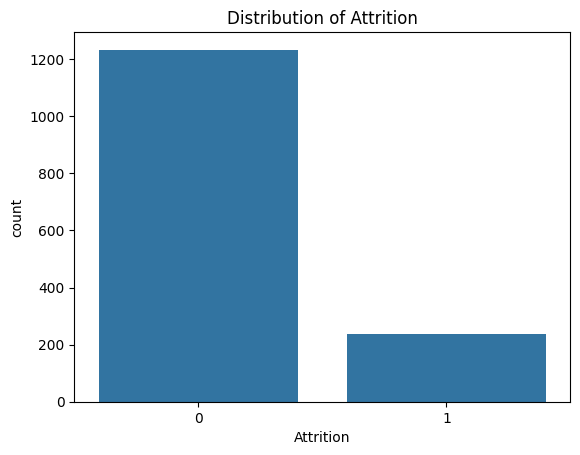

In [12]:
#Exploratory Data Analysis
# 1. Distribution of Attrition
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.show()

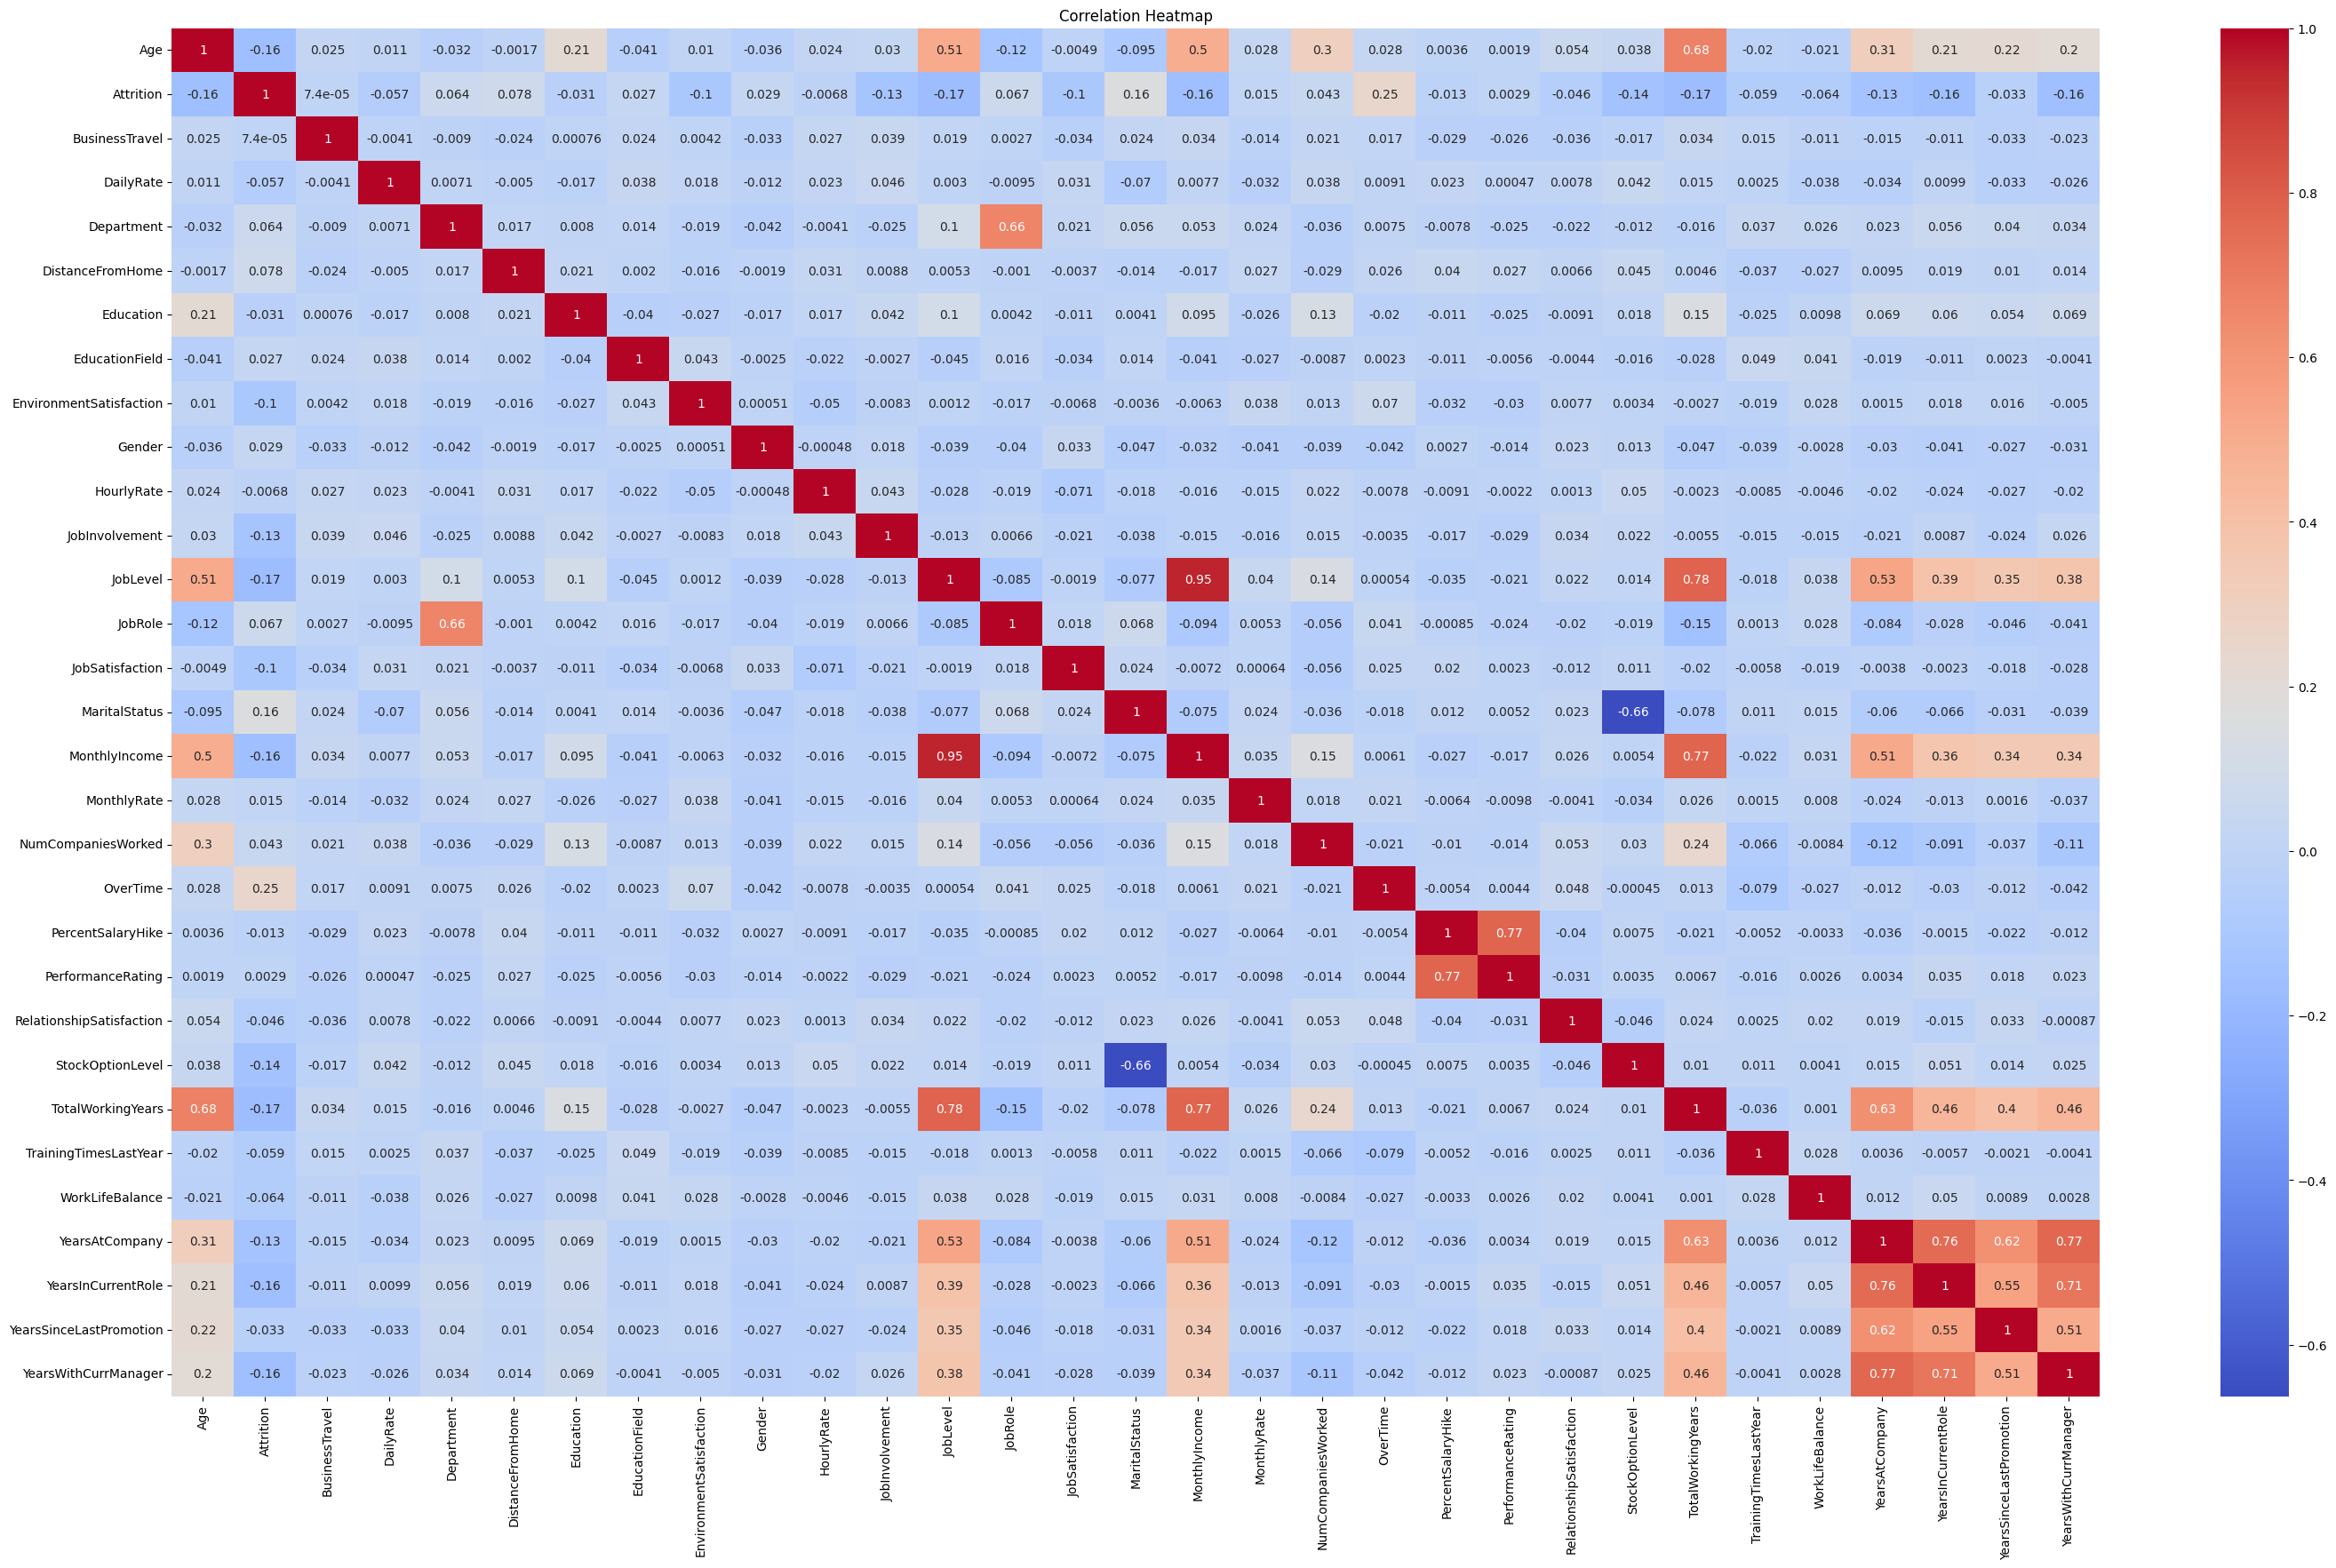

In [13]:

# 2. Correlation Heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

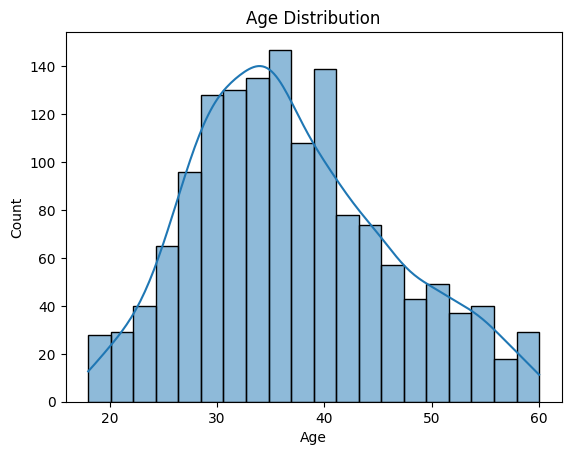

In [14]:
# 3. Distribution of Age
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

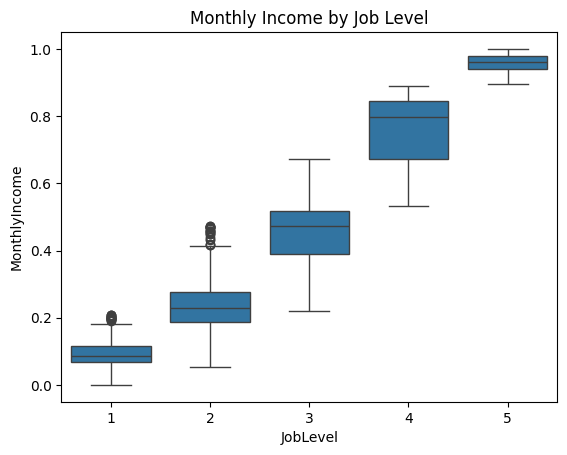

In [15]:
# 4. Boxplot of Monthly Income by Job Level
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Job Level')
plt.show()

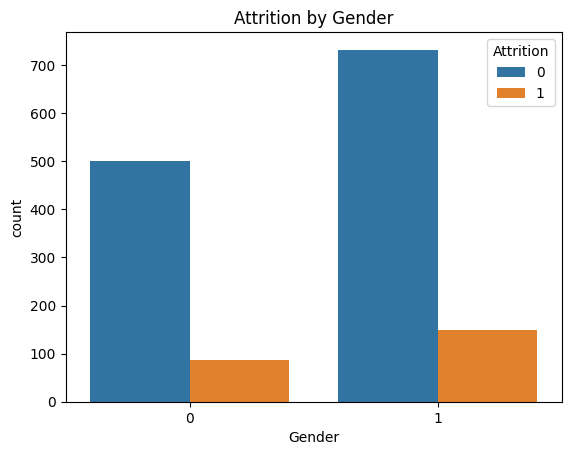

In [16]:
# 5. Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.show()

In [17]:
# 2. Feature Selection
# Select features and target variable  
features = ['Age','Department', 'DistanceFromHome','EducationField', 'Gender', 'JobRole', 
            'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating']
target = 'Attrition'

X = data[features]  # Features
y = data[target]    # Target 



In [18]:
# 3. Model Training
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)



In [19]:
# Initialize the model
model = LogisticRegression()
#start time
start_time = time.time()
# 3.1 Train the model
model.fit(X_train, y_train)

#Model Training Time and Computational Efficiency
end_time = time.time()
training_time = end_time - start_time
print(f"Model Training Time: {training_time:.4f} seconds")

# 3.2 Make predictions
y_pred = model.predict(X_test)
# 3.3 Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


# 3.4 Feature Importance  
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importance)


Model Training Time: 0.0693 seconds
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       372
           1       0.60      0.13      0.21        69

    accuracy                           0.85       441
   macro avg       0.73      0.56      0.57       441
weighted avg       0.82      0.85      0.81       441

                    Importance
OverTime              1.507952
MaritalStatus         0.568611
MonthlyRate           0.358643
Gender                0.266735
Department            0.195941
NumCompaniesWorked    0.118794
DistanceFromHome      0.031805
JobRole              -0.013168
EducationField       -0.035489
Age                  -0.068911
PerformanceRating    -0.176320


c:\Users\kichu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# 6. Save the Model

joblib.dump(model, 'employee_attrition_model.pkl')


['employee_attrition_model.pkl']

In [21]:
# 7. Load the Model
loaded_model = joblib.load('employee_attrition_model.pkl')

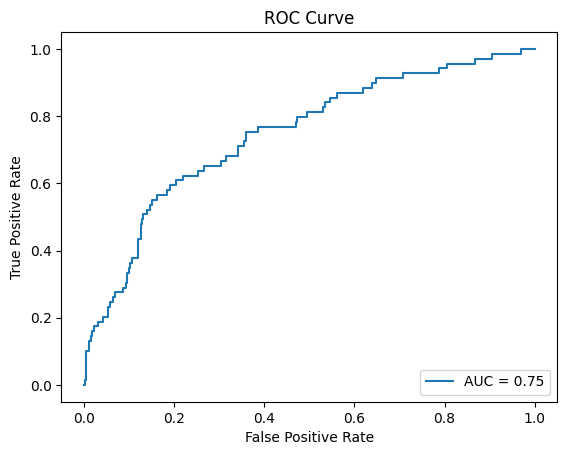

In [22]:
#AUC-ROC

y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc_score(y_test, y_pred_proba))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

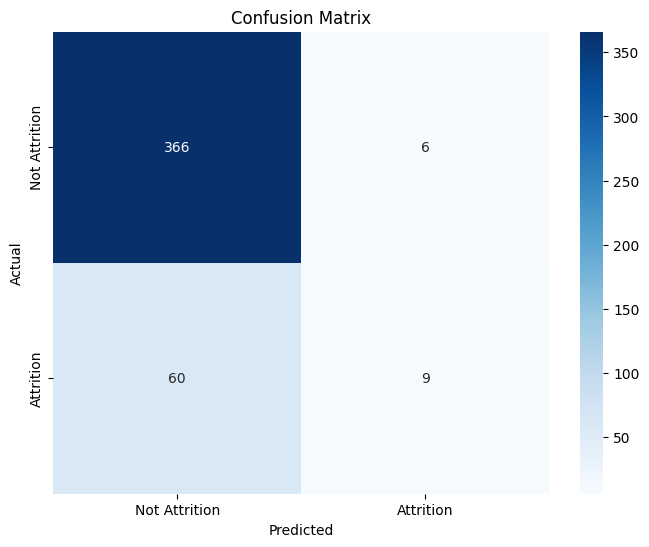

In [23]:
#Confusion Matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrition', 'Attrition'], yticklabels=['Not Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# 8. Make Predictions with the Loaded Model
sample_data = X_test.iloc[:5]  # Sample data for prediction
predictions = loaded_model.predict(sample_data)
predictions = np.round(predictions)  # Round predictions to nearest integer
predictions_df = pd.DataFrame(predictions, columns=['Predicted Attrition'])
predictions_df['Actual Attrition'] = y_test.iloc[:5].values
predictions_df['Correct Prediction'] = predictions_df['Predicted Attrition'] == predictions_df['Actual Attrition']
predictions_df

,Predicted Attrition,Actual Attrition,Correct Prediction
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [48]:
# 2. Feature Selection
# Select features and target variable  
features = ['Age','DailyRate', 'DistanceFromHome','JobSatisfaction','MaritalStatus','OverTime', 'PercentSalaryHike',
             'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager']
target = 'PerformanceRating'

X = data[features]  # Features
y = data[target]    # Target 

In [49]:
# 3. Model Training
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)



In [52]:
# Initialize the model
models = LogisticRegression()
#start time
start_time = time.time()
# 3.1 Train the model
models.fit(X_train, y_train) 
#Model Training Time and Computational Efficiency
# end time
end_time = time.time()
training_time = end_time - start_time
print(f"Model Training Time: {training_time:.4f} seconds")  
# 3.2 Make predictions
y_pred = models.predict(X_test)
# 3.3 Evaluate the model

# classification report
print(classification_report(y_test, y_pred))


# 3.4 Feature Importance
feature_importance = pd.DataFrame(models.coef_[0], index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)  

Model Training Time: 0.0470 seconds
              precision    recall  f1-score   support

           3       1.00      0.99      0.99       378
           4       0.95      0.98      0.97        63

    accuracy                           0.99       441
   macro avg       0.98      0.99      0.98       441
weighted avg       0.99      0.99      0.99       441



c:\Users\kichu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# 6. Save the Model

joblib.dump(models, 'employee_performance_model.pkl')

['employee_performance_model.pkl']

In [61]:
# 7. Load the Model
loaded_models = joblib.load('employee_performance_model.pkl')

c:\Users\kichu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


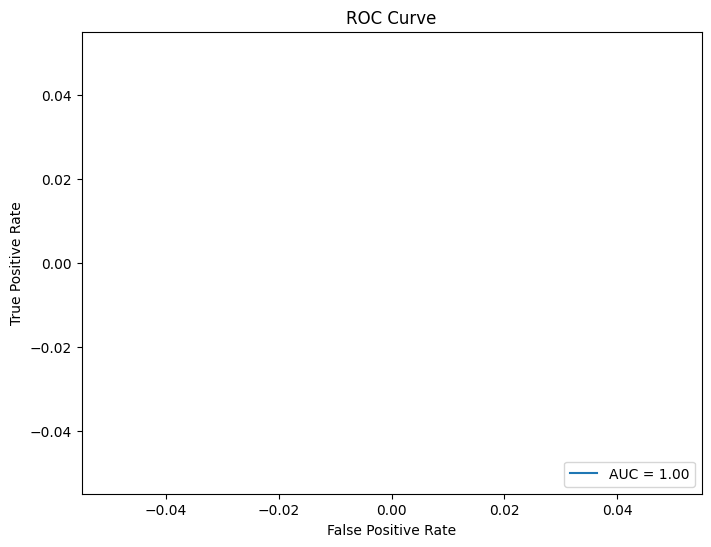

In [62]:
#AUC-ROC

y_pred_proba = loaded_models.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc_score(y_test, y_pred_proba))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 36.72222222222221, 'Predicted')

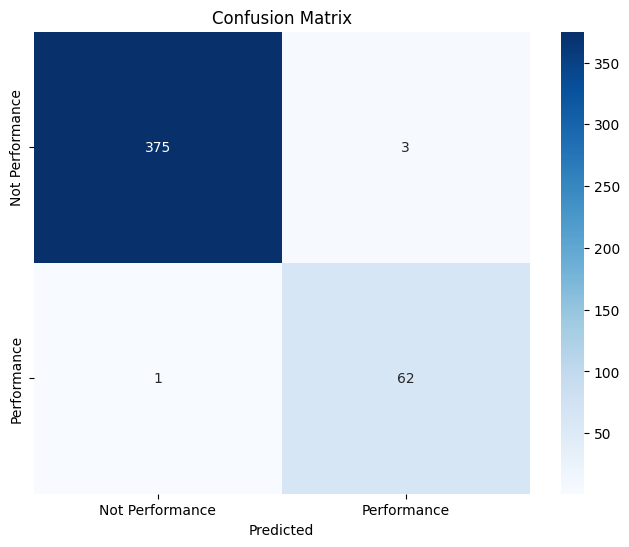

In [63]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Performance', 'Performance'], yticklabels=['Not Performance', 'Performance'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

In [64]:
#Predictions with the Loaded Model
sample_data = X_test.iloc[:5]  # Sample data for prediction
predictions = loaded_models.predict(sample_data)
predictions = np.round(predictions)  # Round predictions to nearest integer
predictions_df = pd.DataFrame(predictions, columns=['Predicted Performance'])
predictions_df['Actual Performance'] = y_test.iloc[:5].values
predictions_df['Correct Prediction'] = predictions_df['Predicted Performance'] == predictions_df['Actual Performance']
predictions_df



,Predicted Performance,Actual Performance,Correct Prediction
0,3,3,True
1,3,3,True
2,4,4,True
3,3,3,True
4,4,3,False
